# Project 1 Comments


- Always double-check your work to make sure that what you are submitting meets the stated requirements for the given Project or Assignment.


- Always double-check your understanding of the definition/meaning of the attributes you have to work with: you may need to do some research (aka, develop some __domain knowledge__).


- Always double-check the results of your analysis: Do your results make sense given what the raw data show? Do your graphics accurately reflect the data used to create them? etc.


- Always double-check written content for spelling, capitalization, and grammar errors: your goal should be a "professional"-style deliverable.


- Always double-check your Jupyter Notebook before submitting to ensure that graphics are displayed as you had expected and that Markdown cells are rendering as you had expected.


<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>

# Week 6: Data I/O with Pandas + Exploratory Data Analysis

In [1]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

In [5]:
# read contents of a csv file from GitHub into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
# use the read_table() function to get the same result as above
pd.read_table('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
# read a file that has no column headers
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
# assign column names while reading the file
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
# assign the contents of a specific column to serve as the row index
# for the data frame
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


### Create a hierarchical index using 2 columns

In [12]:
# display the contents of the file
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/csv_mindex.csv')


,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [13]:
# use the columns labeled 'key1' & 'key2' as the hierarchical index keys
parsed = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

### What if we have no explicit field delimeters?

What if a file contains tabular data that has no fixed delimeter (e.g., it uses whitespace or some other pattern to separate the data fields)?

Here's an example from the author:
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex3.txt

We can use a 'regular expression' to parse the file

(*NOTE: We'll be learning more about regular expressions later in the semester*)

In [15]:
# pass a regular expression: 's' indicates whitespace; '+' indicates that we should skip
# all whitespace following the end of a non-whitespace character to find the next
# valid data item
result = pd.read_table('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


NOTE: Since there was no column heading given at the top of the first column, read_csv() has infered that the first column should be used as the row index.

### Skipping Rows While Reading a File

Sample File:

https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex4.csv

In [16]:
# this file contains extraneous data that should be ignored
# look what happens when we try to read it
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex4.csv')

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [17]:
# specify rows to ignore using the 'skiprows' parameter
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### What happens if data values are missing?

Pandas will assign 'NaN' to missing data values by default.

In [19]:
result = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [20]:
# test each data value within the data frame for missing data
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


### Very Large Files: How to Avoid Reading Too Much Data Into Memory At Once

We can specify how many rows to read or define a "chunksize" to enable automatic iteration through the file

In [21]:
# limit number of rows read using 'nrows' parameter
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [22]:
# define a fixed-size 'chunksize' 
chunker = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex3.txt', chunksize=1000)
chunker

In [23]:
# read through the file using chunksize = 1000
chunker = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex6.csv', chunksize=1000)

# define a Series object to store the results of calculations
tot = pd.Series([])

# now iteratively read through the file, summing value counts of rows having
# similar 'key' values
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

# sort the summed results in descending order
tot = tot.sort_values(ascending=False)

In [24]:
# display the first 10 summed values
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### Other Formats?

The balance of Chapter 6 provides easy to follow examples of how to read various file formats. Since that content is somewhat repetitive, it is not covered as part of this lecture. However, you should still become familiar with the basics of how to read other non-CSV formats (e.g., Excel, JSON, XML, HTML, etc.) into Pandas objects (particularly if you would like to work with data in those formats for any of your upcoming assignments/projects). 

We will be revisiting Chapter 6 during Week 11, when we focus on working with Web data.



## Exploratory Data Analysis (EDA)

- EDA = Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data.

- Thorough EDA work is crucial for purposes of making sense of a data set and helping you to determine what questions you can realistically expect to ask and answer using the contents of a data set.

- __A concise explanatory narrative of your EDA findings is *ALWAYS* necessary: you need to be able to clearly communicate your EDA work to others__. If you can't clearly articulate your EDA findings, how can anyone else validate the work you've done?

### Summarizing the Characteristics of Your Data

- Use of summary statistics (e.g., max, min, mean, median, mode, interquartile range bounds, numeric value range bounds, etc.)

- For numeric data: use of histograms, box plots, scatter plots, line plots

- For categorical data: use of bar plots

- For categorical data: How many valid categorizations are there for a given attribute? How are those categorizations identified within the data? What is the frequency/count of each possible categorization within the data set?

### Identifying Relationships Between Attributes

- Calculate correlations between attributes: correlation matrices, pair plots, etc.

- Use scatter plots to visualize the relationship between attributes.

- For categorical variables, you will need to calculate value counts prior to attempting to calculate correlation values.

### Discovering Patterns & Trends

- For data that has a chronology, what (if any) repeating patterns can be identified? 

- For data that has a chronology, is there a directional tendency evident?

### Outliers

- For each attribute (both numeric and categorical): are there data values that fall far outside the norm for the data? 

- For numerics: use scatter plots + box plots to find outliers

- For categoricals: check for items that either don't appear to conform to the known valid values for the attribute OR occur very infrequently within the attribute.

### Missing / Invalid Data Values

- For each attribute: take a count of the number of values that either don't conform to the attribute's known valid value range and/or that are missing in their entirety (e.g., how many 'NaN' values are found for a given attribute? What about other 'NaN' proxies, e.g., '?', 'unk', etc.)

- What percentage of an attribute's values are missing/unknown?


### Examples of How to Create a BarPlot for a Categorical Attribute

- We'll use the 'hflights' data set from Project 1

In [2]:
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
df2 = pd.read_csv(filename)
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


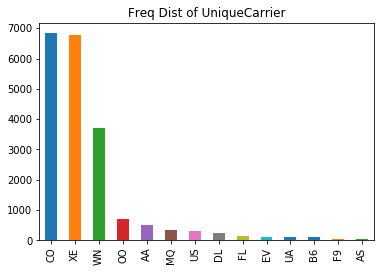

In [17]:
# create a barplot for the UniqueCarrier attribute
# use the value.counts() method to tally up the counts of distinct
# values within the attribute, then invoke the bar plot method
bplt = df2['UniqueCarrier'].value_counts().plot.bar(title = "Freq Dist of UniqueCarrier")
bplt;

The frequency distribution of the UniqueCarrier attribute provides us with a count of the number of flights operated by each airline, e.g., Continental (CO) operated nearly 7000 total outbound flights from IAH and HOU during the timeframe covered by the data set.

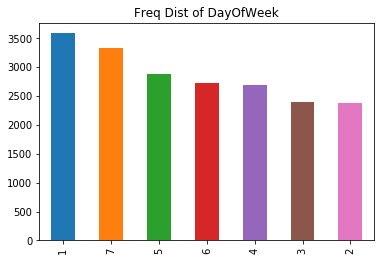

In [18]:
# create a bar plot for the DayOfWeek attribute
bplt2 = df2['DayOfWeek'].value_counts().plot.bar(title = "Freq Dist of DayOfWeek")
bplt2;

The frequency distribution of the DayOfWeek attribute tells us how many flights departed from IAH and HOU for each day of the week during the timeframe covered by the data set. Which day of the week was the busiest? Which day of the week was the least busy?


### Creating a Correlation Matrix

- A correlation matrix can help you understand the relationships between numeric variables within a data set.


- Positive numbers indicate a positive relationship between the attributes (i.e., as the values of one attribute increase, the values of the second attribute are likely to increase).


- Negative numbers indicate a negative relationship between the attributes (e.g., as the values of one attribute increase the values of the second attribute are likely to decrease).


- The larger the correlation value, the greater the degree of correlation (either positive or negative) between the variables.


- Correlation metrics are not proof of a __meaningful__ correlation between two attributes: __correlation does not imply "causation"__!!! It is possible to find meaningless correlations between all sorts of data values.


- Correlation metrics can provide clues as to which variable pairs might be worthy of further examination to determine whether or not they have a __meaningful__ correlation.


- Even relatively low correlation metrics can be indicative of a meaningful directional relationship between two attributes/variables.


- __NOTE__: We cannot directly compute correlation metrics with categorical values. Categorical values must be translated into "1 hot" dummy variables whose values are either True (the categorical value is present in the use case) or False (the categorical value is not present in the use case). One dummy variable is needed for each nominal categorical attribute value. Correlation metrics can then be computed by correlating the dummy variables with other attributes within the data set. We'll learn more about this concept in Week 8.


#### An Example of a Correlation Matrix (hflights data set)

In [3]:
# create a correlation matrix for the attributes within the data frame
df2.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.177819,0.049042,0.004809,0.007703,-0.144629,0.117162,0.106613,0.045889,0.063908,0.109850,0.068020,0.088724,0.005844,-0.000359
DayofMonth,NaN,0.177819,1.000000,-0.004395,-0.007822,-0.001269,-0.028473,0.019835,0.008580,-0.058173,-0.058212,0.017866,-0.000509,0.099405,-0.023081,-0.008030
DayOfWeek,NaN,0.049042,-0.004395,1.000000,0.015308,0.014751,0.003954,0.012862,0.020350,-0.030531,-0.013786,0.027737,0.009283,-0.062055,-0.047028,-0.012469
DepTime,NaN,0.004809,-0.007822,0.015308,1.000000,0.868545,0.005284,-0.053730,-0.056142,0.199604,0.218022,-0.061195,-0.053457,0.031561,0.004289,-0.004613
ArrTime,NaN,0.007703,-0.001269,0.014751,0.868545,1.000000,-0.006722,0.043078,0.034020,0.126469,0.139104,0.056867,0.007496,0.085209,NaN,-0.004453
FlightNum,NaN,-0.144629,-0.028473,0.003954,0.005284,-0.006722,1.000000,-0.240650,-0.244212,-0.030760,-0.079826,-0.247541,-0.062218,-0.019991,-0.005918,0.017362
ActualElapsedTime,NaN,0.117162,0.019835,0.012862,-0.053730,0.043078,-0.240650,1.000000,0.990503,0.081460,0.072029,0.969355,0.257506,0.283326,NaN,NaN
AirTime,NaN,0.106613,0.008580,0.020350,-0.056142,0.034020,-0.244212,0.990503,1.000000,0.054197,0.075957,0.975277,0.185612,0.166291,NaN,NaN
ArrDelay,NaN,0.045889,-0.058173,-0.030531,0.199604,0.126469,-0.030760,0.081460,0.054197,1.000000,0.911470,0.025076,0.125916,0.178892,NaN,NaN


## Case Study: UCI Pittsburgh Bridges Data Set

Look at the Dataset and Dataset Description for the Pittsburgh Bridges data set: https://archive.ics.uci.edu/ml/datasets/Pittsburgh+Bridges

Start by reading the “version1” data into a Pandas data frame and applying meaningful names to each of the columns. 

Next, tackle the following questions / tasks:
- What are the possible values for RIVER found in the data?  Are there any unexpected values?  If so, how would you handle these values?
- Provide some basic exploratory data analysis (EDA) of the Pittsburgh bridges data. 
- Once you’ve completed your EDA, identify one or two interesting questions that this data might provide insights about.


Here's a pd.read_csv() function call that will load the data set for you:

In [1]:
import pandas as pd

# load the data set: the shape attribute shows we have 108 rows & 13 columns

# original data load: no longer works due to UCI taking data set offline
# pb_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1", header = None)

pb_df = pd.read_csv("https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week6/bridges.data.version1", header = None)
pb_df.shape

(108, 13)

In [2]:
# sanity check - make sure data was read in as expected
pb_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [21]:
# add meaningful column names
pb_df.columns = ['Identif', 
                'River',
                'Location',
                'Erected', 
                'Purpose',
                'Length',
                'Lanes',
                'Clear-G',
                'T-OR-D',
                'Material',
                'Span',
                'REL-L',
                'Type']

In [22]:
# sanity check
pb_df.head(10)

,Identif,River,Location,Erected,Purpose,Length,Lanes,Clear-G,T-OR-D,Material,Span,REL-L,Type
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500,2,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,?,1,N,DECK,WOOD,?,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


#### What are the possible values for the "River" attribute?

In [ ]:
# display unique values of 'River'

In [6]:
pb_df.River.unique()

array(['M', 'A', 'O', 'Y'], dtype=object)

The results show us that there are 4 unique values within the 'River' attribute. However, the data dictionary only lists 3 ('A' = Allegheny; 'M' = Monongahela; 'O' = Ohio). What to do?

Should we:
1. Delete the rows containing a 'Y'?
2. Delete the column in its entirety?
3. Replace the 'Y' values with the most common of the three values listed in the data dictionary?
4. Other approaches? 

How would our analysis potentially be impacted if we implemented any of suggestions 1 through 3?

One possible alternative: use __domain knowledge__ to solve the dilemma. Use of 'Domain knowledge' would require that you do some independent research to determine whether or not the value of 'Y' might in fact be valid, but for some reason was not explained in the data dictionary.

In this case, 'Y' is, in fact, a plausible value for the 'River' attribute: The Youghiogheny River flows into the Monongahela River. You could discover this on your own via a bit of research (a.k.a., developing your domain knowledge).


### Now complete your EDA and formulate one or two interesting questions which this data could potentially help answer.

Here are some examples of the types of analysis you would want to be sure to include as part of an EDA for the Pittsburgh Bridges data set:

In [6]:
# get the value counts for the Purpose variable: Most bridges appear to have been built for use
# highways
pb_df['Purpose'].value_counts()

HIGHWAY     71
RR          32
AQUEDUCT     4
WALK         1
Name: Purpose, dtype: int64

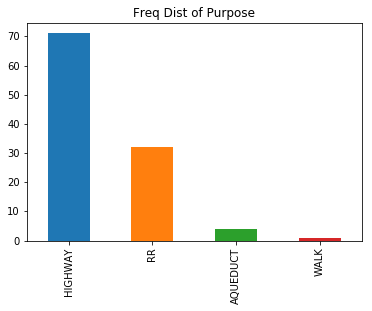

In [7]:
# create a bar plot of the Purpose variable's value counts
bplt2 = pb_df['Purpose'].value_counts().plot.bar(title = "Freq Dist of Purpose")
bplt2;

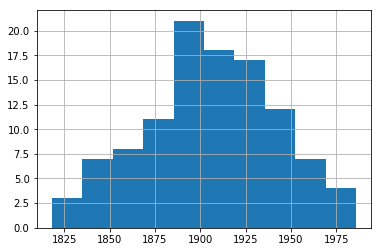

In [9]:
# plot a histogram of the Erected variable to get a sense of what time period had the 
# most bridge construction activity: it appears that the late 1800's had the greatest amount of 
# activity
pb_df['Erected'].hist()

In [10]:
# get the value counts for the River variable: Most appear to span the Allegheny river
pb_df['River'].value_counts()

A    49
M    41
O    15
Y     3
Name: River, dtype: int64

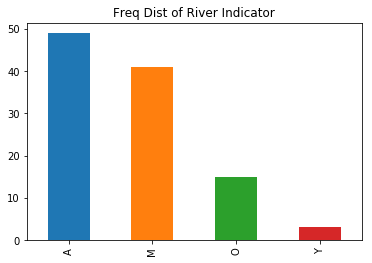

In [11]:
# create a bar plot of the River variable's value counts
bplt3 = pb_df['River'].value_counts().plot.bar(title = "Freq Dist of River Indicator")
bplt3;

In [12]:
# get the value counts for the Material variable: Most bridges in the data set are made of steel
pb_df['Material'].value_counts()

STEEL    79
WOOD     16
IRON     11
?         2
Name: Material, dtype: int64

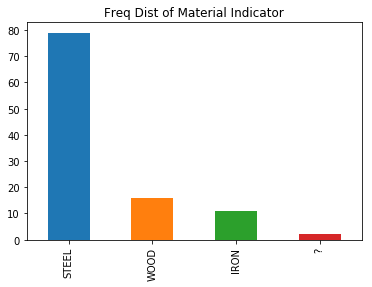

In [13]:
# create a bar plot of the Material variable's value counts
bplt4 = pb_df['Material'].value_counts().plot.bar(title = "Freq Dist of Material Indicator")
bplt4;

In [23]:
# For the Length variable we need to replace the '?' with NaN before doing any computations:
pb_df["Length"].replace({'?':np.nan}, inplace = True)


In [25]:
# check the data type of the Length variable: it is not numeric so we will need to convert it
pb_df["Length"].dtype

dtype('O')

In [27]:
# convert the data type of the Length column to numeric
pb_df["Length"] = pd.to_numeric(pb_df["Length"])

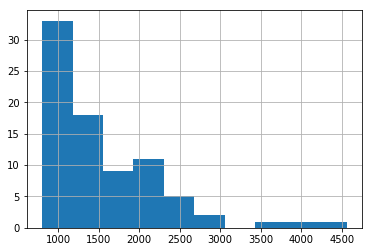

In [28]:
# now create a histogram of Length: it appears that a large percentage of bridges have a span of
# less than 1250 feet
pb_df["Length"].hist()

In [33]:
# lets calculate how many bridges have a span of less than 1250 feet: a total of 
pd.value_counts(pb_df['Length'] < 1250)

False    68
True     40
Name: Length, dtype: int64

In [34]:
# now calculate the overall percentage of bridges having a length of less than 1250 feet:
# Approximate 37% of the bridges in the data set (40/108) have a length of less than 1250 feet
pd.value_counts(pb_df['Length'] < 1250)[1] / pb_df.shape[0]

0.37037037037037035

In [29]:
# get summary statistics for Length: the average bridge length is 1567 feet; 
# the shortest bridge is 804 feet and the longest is 4558 feet, which is approx. 8/10 of a mile
pb_df["Length"].describe()

count      81.000000
mean     1567.469136
std       747.491523
min       804.000000
25%      1000.000000
50%      1300.000000
75%      2000.000000
max      4558.000000
Name: Length, dtype: float64